In [89]:
import numpy as np
import pandas as pd
import glob
import os
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt




In [181]:
all_rentals = pd.read_csv(r"C:\Users\mattl\OneDrive\Documents\reibrowser\Database\Redfin Data\rentals.csv")

single_family_home_rentals = all_rentals[(all_rentals["Property Type"] == 6) & (all_rentals["Max Beds"] < 5) & (all_rentals["State"]).isin(["WA", "OR"])]


## First Use KNN to get an average rent price for the 10 nearest houses with the same number of bedrooms

In [182]:

knn_features = ["Latitude", "Longitude"]

target = "Max Rent Price"

single_family_home_rentals['KNN_Rent_Value'] = np.nan

for beds in range(1, 5, 1):
    print(beds)
    knn_df = single_family_home_rentals.dropna(subset=knn_features + [target])
    knn_df = knn_df[knn_df["Max Beds"] == beds]
    print("Houses Analyzed", len(knn_df))
    
    if len(knn_df) > 1:
        X = knn_df[knn_features]
        y = knn_df[target]

        # Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize KNN Regressor
        knn_regressor = KNeighborsRegressor(n_neighbors=10, metric='haversine')

        # Fit the model
        knn_regressor.fit(X_train, y_train)

        # Predict on the training set to get KNN rent values
        y_knn = knn_regressor.predict(X)

        # Append the KNN rent values to the DataFrame
        single_family_home_rentals.loc[knn_df.index, 'KNN_Rent_Value'] = y_knn

        # Predict on the test set for evaluation
        y_pred = knn_regressor.predict(X_test)

        # Evaluate the model
        mse = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"Mean Absolute Error: {mse}")
        print(f"Rsquared: {r2}")

display(single_family_home_rentals)

1
Houses Analyzed 585
Mean Absolute Error: 263.24615384615385
Rsquared: 0.17541489512899588
2
Houses Analyzed 1022
Mean Absolute Error: 388.76341463414633
Rsquared: 0.3537871965294517
3
Houses Analyzed 1322
Mean Absolute Error: 472.45849056603777
Rsquared: 0.31788465032856905
4
Houses Analyzed 587
Mean Absolute Error: 729.4932203389831
Rsquared: 0.5421153709651012


C:\Users\mattl\AppData\Local\Temp\ipykernel_37828\2968080741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_family_home_rentals['KNN_Rent_Value'] = np.nan


,Property ID,URL,Property Type,Address,City,State,ZIP Code,Country Code,Latitude,Longitude,...,Max Square Feet,Max Rent Price,Description,cbg_geoid,cbsa_geoid,cbsa_name,state_id,State_Code,updated_date,KNN_Rent_Value
34,26731366,/OR/Beaverton/17276-SW-Alexander-St-97003/home...,6,17276 SW Alexander St,Beaverton,OR,97003.0,1,45.493369,-122.854824,...,850.0,1575.0,SCHEDULE A SHOWING ONLINE AT: http://showmojo....,4.106703e+11,38900.0,"Portland-Vancouver-Hillsboro, OR-WA",38.0,OR,NaN,2060.5
35,26680212,/OR/Beaverton/1543-SW-Cloverdale-Way-97003/hom...,6,1543 SW Cloverdale Way,Beaverton,OR,97003.0,1,45.508653,-122.893132,...,1312.0,2400.0,This great home won't last long. Comfortable 3...,4.106703e+11,38900.0,"Portland-Vancouver-Hillsboro, OR-WA",38.0,OR,NaN,2562.9
36,26674929,/OR/Beaverton/945-SW-178th-Pl-97003/home/26674929,6,945 SW 178th Pl,Beaverton,OR,97003.0,1,45.513198,-122.860591,...,1356.0,2450.0,"Introducing a spacious 4-bedroom, 2-bathroom h...",4.106703e+11,38900.0,"Portland-Vancouver-Hillsboro, OR-WA",38.0,OR,NaN,3193.0
39,26656630,/OR/Beaverton/17776-SW-Lawton-St-97003/home/26...,6,17776 SW Lawton St,Beaverton,OR,97003.0,1,45.511234,-122.859975,...,1075.0,2400.0,"Introducing a charming 4 bedroom, 2 bathroom h...",4.106703e+11,38900.0,"Portland-Vancouver-Hillsboro, OR-WA",38.0,OR,NaN,3318.0
42,26650370,/OR/Beaverton/3117-SW-173rd-Ave-97003/home/266...,6,3117 SW 173rd Ave,Beaverton,OR,97003.0,1,45.497203,-122.855652,...,1572.0,2699.0,*Here is your opportunity to find your dream h...,4.106703e+11,38900.0,"Portland-Vancouver-Hillsboro, OR-WA",38.0,OR,NaN,3843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8466,126455761,/WA/Walla-Walla/415-N-Roosevelt-St-99362/home/...,6,415 N Roosevelt St,Walla Walla,WA,99362.0,1,46.076743,-118.312791,...,1502.0,2395.0,Inviting 3 Bedroom House with Lots of Parking<...,5.307192e+11,47460.0,"Walla Walla, WA",48.0,WA,NaN,2643.0
8468,175985279,/WA/Walla-Walla/235-W-Sumach-St-99362/home/175...,6,235 W Sumach St,Walla Walla,WA,99362.0,1,46.066870,-118.343635,...,1940.0,2595.0,Centrally located townhome built in 2008. This...,5.307192e+11,47460.0,"Walla Walla, WA",48.0,WA,NaN,2643.0
8476,126380542,/WA/Walla-Walla/105-N-Bellevue-Ave-99362/home/...,6,105 N Bellevue Ave,Walla Walla,WA,99362.0,1,46.071801,-118.318243,...,2244.0,2245.0,"Four bedroom, two bathroom, single family home...",5.307192e+11,47460.0,"Walla Walla, WA",48.0,WA,NaN,3000.9
8482,126381245,/WA/Walla-Walla/536-Pleasant-St-99362/home/126...,6,536 Pleasant St,Walla Walla,WA,99362.0,1,46.061948,-118.323622,...,1725.0,2495.0,Charming 4 bedroom Home<BR><BR>Welcome to this...,5.307192e+11,47460.0,"Walla Walla, WA",48.0,WA,NaN,3000.9


# Regression using Nearest Neighbor Rental value is effective

Max Beds           0.616418
Max Baths          0.639167
Max Square Feet    0.782195
KNN_Rent_Value     0.809926
dtype: float64


<Axes: >

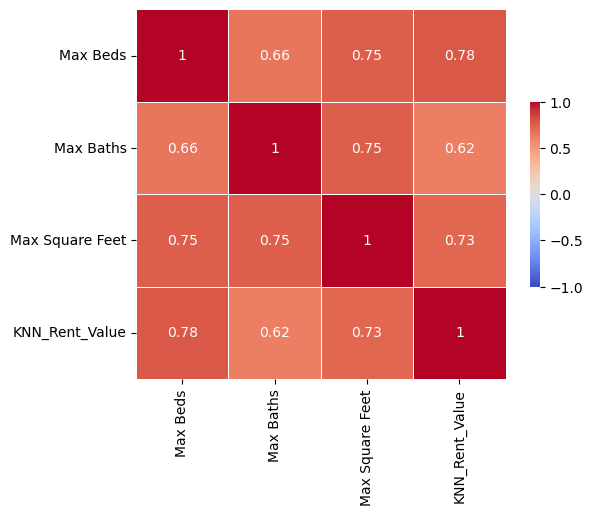

In [183]:
#Check Feature Correlation
regression_features = ["Max Beds", "Max Baths", "Max Square Feet", "KNN_Rent_Value"]
target = "Max Rent Price"

corr = single_family_home_rentals[regression_features].corrwith(single_family_home_rentals[target])

print(corr)

correlation_matrix = single_family_home_rentals[regression_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [184]:
linear_reg_df = single_family_home_rentals.dropna(subset=regression_features + [target])

print(len(single_family_home_rentals) - len(linear_reg_df)," Out of ", len(single_family_home_rentals), " Houses removed for data quality")

X = linear_reg_df[regression_features]
y = linear_reg_df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.22, random_state= 69)

y_pred = LinearRegression().fit(X_train, y_train).predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error ", mae)
print("Rsquared Value ",r2)

587  Out of  3690  Houses removed for data quality
Mean Absolute Error  337.9000502448256
Rsquared Value  0.7663117335790454


## Now incorporate Demographics Information

In [185]:
median_income = pd.read_csv(r"C:\Users\mattl\OneDrive\Documents\reibrowser\Database\Rent Training Data\ACSDT5Y2022.B19013-Data.csv", skiprows=[1], na_values='-')

median_income['GEO_ID'] = median_income['GEO_ID'].astype(str)

# Extracting everything after "US" and storing it in a new column 'cbg_geoid'
median_income['cbg_geoid'] = median_income['GEO_ID'].str.extract('US(\d+)')

median_income['median_income'] = median_income['B19013_001E'].str.replace(',','+').str.replace('+','').str.replace('-','').astype(float)

median_income = median_income[["cbg_geoid", "median_income"]]

epa_cbg_demo = pd.read_csv(r"C:\Users\mattl\OneDrive\Documents\reibrowser\Database\Rent Training Data\EPA_SmartLocationDatabase_V3_Jan_2021_Final (1).csv")

epa_cbg_demo["cbg_geoid"] = \
    epa_cbg_demo["STATEFP"].astype(str).str.zfill(2)  \
    + epa_cbg_demo["COUNTYFP"].astype(str).str.zfill(3) \
    + epa_cbg_demo["TRACTCE"].astype(str).str.zfill(6) \
    + epa_cbg_demo["BLKGRPCE"].astype(str)


cbg_demographics = epa_cbg_demo.merge(median_income, on='cbg_geoid', how="inner")

In [186]:
single_family_home_rentals["cbg_geoid"] = single_family_home_rentals["cbg_geoid"].astype(float)
cbg_demographics["cbg_geoid"] = cbg_demographics["cbg_geoid"].astype(float)

demo_corr_test_df = pd.merge(single_family_home_rentals, cbg_demographics, on='cbg_geoid', how='inner', suffixes=('_rental', '_demo'))


C:\Users\mattl\AppData\Local\Temp\ipykernel_37828\1129983640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_family_home_rentals["cbg_geoid"] = single_family_home_rentals["cbg_geoid"].astype(float)


## Check for Correlation

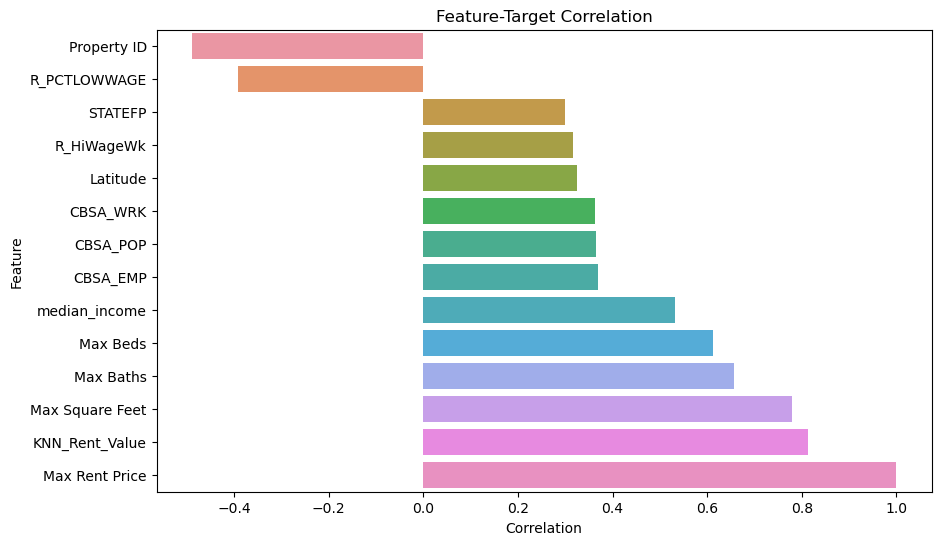

In [187]:

demo_basic_features = demo_corr_test_df.select_dtypes(include = ["number"]).columns
target = "Max Rent Price"

feature_target_correlation = pd.DataFrame({
    "feature": demo_basic_features,
    "correlation": demo_corr_test_df[demo_basic_features].corrwith(demo_corr_test_df[target])
})



# Reset index to turn the index into a column
feature_target_correlation.reset_index(drop=True, inplace=True)

correlation_to_plot = feature_target_correlation[abs(feature_target_correlation["correlation"]) > .3 ]

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.barplot(x="correlation", y="feature", data=correlation_to_plot.sort_values("correlation"))

# Add titles and labels
plt.title('Feature-Target Correlation')
plt.xlabel('Correlation')
plt.ylabel('Feature')

# Display the plot

plt.show()

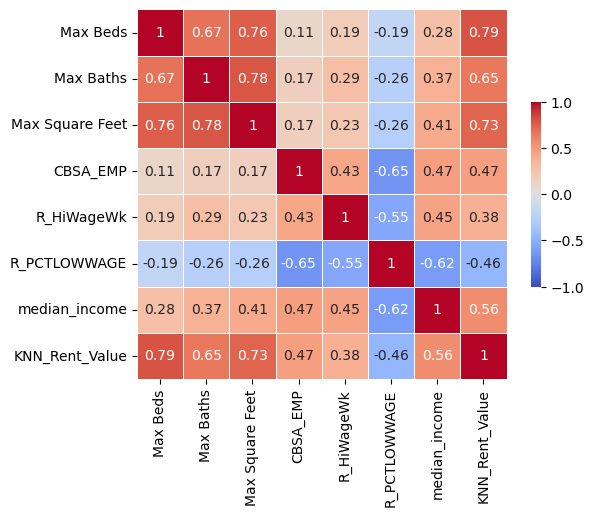

In [188]:
features = [
 'Max Beds',
 'Max Baths',
 'Max Square Feet',
#  'CBSA_POP',
 'CBSA_EMP',
#  'CBSA_WRK',
 'R_HiWageWk',
 'R_PCTLOWWAGE',
 'median_income',
 'KNN_Rent_Value'
]

demo_regression_df = demo_corr_test_df[features + [target]]

sns.heatmap(demo_regression_df[features].corr(), annot=True, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [189]:
regression_metadata = demo_corr_test_df.dropna(subset=features + [target])

print(len(demo_regression_df) - len(regression_metadata), " out of ", len(demo_regression_df), " houses removed for data quality")

# Define features and target
X = regression_metadata[features]
y = regression_metadata[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=69)

# Initialize and train the regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_test_pred = linear_regressor.predict(X_test)
# Predict on the training set
y_train_pred = linear_regressor.predict(X_train)

# Combine the training and test sets
X_combined = pd.concat([X_train, X_test])
y_combined_pred = np.concatenate([y_train_pred, y_test_pred])
train_flag_combined = np.concatenate([np.ones(len(X_train)), np.zeros(len(X_test))])

# Add the predictions and flags back to the DataFrame
regression_metadata.loc[X_combined.index, 'Predicted_Rent'] = y_combined_pred
regression_metadata.loc[X_combined.index, 'Used_in_Training'] = train_flag_combined

final_df = regression_metadata[["Property ID", "Address"] + features + ["Predicted_Rent", "Used_in_Training"] + [target]]

# Merge the results back to the original dataset

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Mean Absolute Error:", mae)
print("R-squared Value:", r2)


display(final_df[final_df["Used_in_Training"] == 0])

421  out of  2324  houses removed for data quality
Mean Absolute Error: 393.6786573310177
R-squared Value: 0.7162820373934766


C:\Users\mattl\AppData\Local\Temp\ipykernel_37828\1231938551.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_metadata.loc[X_combined.index, 'Predicted_Rent'] = y_combined_pred
C:\Users\mattl\AppData\Local\Temp\ipykernel_37828\1231938551.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_metadata.loc[X_combined.index, 'Used_in_Training'] = train_flag_combined


,Property ID,Address,Max Beds,Max Baths,Max Square Feet,CBSA_EMP,R_HiWageWk,R_PCTLOWWAGE,median_income,KNN_Rent_Value,Predicted_Rent,Used_in_Training,Max Rent Price
0,25732968,1611 SW San Mateo Ter,3,2.5,1575.0,1165042,955,0.181240,87725.0,2798.5,2792.573888,0.0,2595.0
6,191142106,11900 SW 5th St Unit 7,1,1.0,700.0,1165042,409,0.199620,61250.0,1505.0,1627.823196,0.0,1300.0
11,26667987,13770 SW Linda Ln,2,1.0,944.0,1165042,598,0.176717,81579.0,2014.4,1824.105764,0.0,1995.0
14,26654413,16435 SW Milan St,4,3.0,2271.0,1165042,958,0.177083,92050.0,3700.4,3759.927509,0.0,3000.0
17,170143389,17226 SW Kite Ln,4,2.5,1976.0,1165042,683,0.169086,209375.0,4074.9,3958.250989,0.0,3195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,171494088,1160 SW Virginia St,3,2.0,1560.0,25594,299,0.219780,69577.0,2592.5,2574.663765,0.0,2295.0
2300,75197120,205 Davenport St,2,1.5,1800.0,120348,287,0.226608,56389.0,1545.0,2227.084877,0.0,2200.0
2305,189013305,870 Walton Pl,2,2.0,919.0,120348,405,0.167949,106813.0,1552.5,1695.250301,0.0,1450.0
2308,75225032,1520 McPherson Ave,3,1.5,1600.0,120348,0,0.000000,88434.0,2255.5,2326.845080,0.0,1850.0


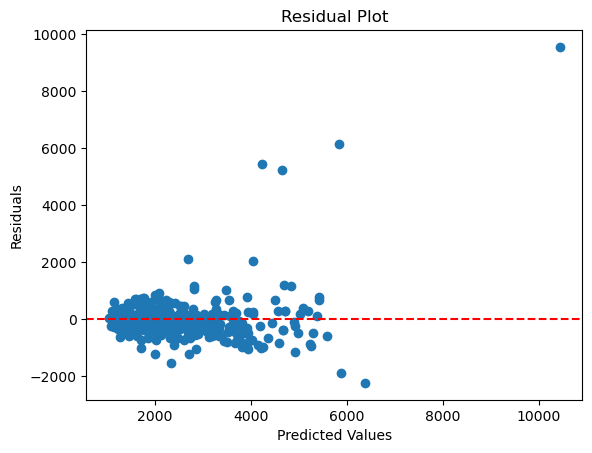

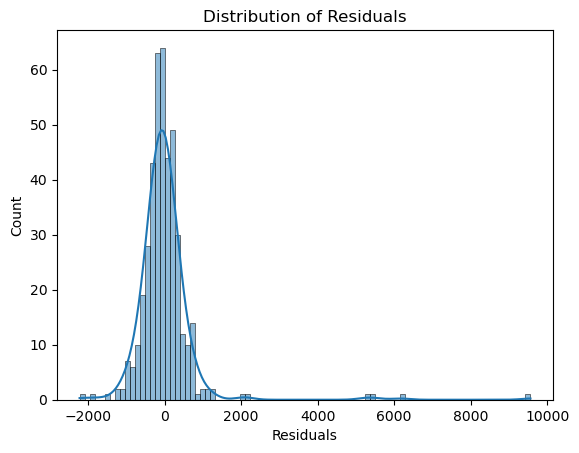

           Feature  Coefficient
0         Max Beds  -413.514097
1        Max Baths   194.706274
2  Max Square Feet     0.800256
3         CBSA_EMP     0.000004
4       R_HiWageWk    -0.141513
5     R_PCTLOWWAGE   -57.195700
6    median_income     0.001650
7   KNN_Rent_Value     0.797857


In [190]:

residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_regressor.coef_
})

print(feature_importance)